
# Sugarscape : Observer l'émergence d'inégalités dans une population 

**Projet Informatique - 1A ENSAE**

*Etemad Câran, Gajdos Romane, Le Gallic-Ach Clara*


# Première partie : présentation du projet 

**Projet de Programmation – 1A Semestre 2**

**Objectif** : Simuler l’émergence et l'évolution des inégalités dans une population d'agents hétérogènes et autonomes

**Modèle suivi** : Le Sugarscape d’Epstein et Axtell. C’est un programme de modélisation des agents. Dans sa forme plus basique, des fourmis évoluent de manière autonome sur un plan 2D parsemé de ressources (les grains de sucre) qu’elles doivent consommer pour survivre. 

2 propriétés élémentaires :
-	Autonomie des agents : ils évoluent comme bon leur semble, il n’y a pas d’autorité centrale
-	Hétérogénéité des agents : ils ne naissent pas égaux, ils ont des capacités de stockage différentes et la quantité de grains qu’ils ont à disposition varie en fonction de leur lieu de naissance sur le plan

D’autres hypothèses peuvent s’ajouter pour améliorer le modèle.  

**Notre modèle** : En s’inspirant du modèle présenté par Epstein et Axtell, nous avons pas à pas créé un tableau générant aléatoirement des grains de sucre et un tableau (de mêmes dimensions) générant des fourmis capables de se déplacer dans un rayon qui nous appellerons leur vision. Leur but est de se déplacer sur la case (à l’intérieur de leur vision) contenant le maximum de sucre afin d’augmenter sa richesse. Chaque fourmi consomme 1 grain de sucre par déplacement (si possible). Une fourmi qui a une richesse nulle meurt (« de faim » nous dirons).

Nous avons ensuite ajouté des hypothèses :

-	Chaque fourmi a une capacité de stockage. Quand elle est sur une case, elle consomme 1 grain et stocke le reste selon sa capacité et ce qu’il reste sur la case. Si une fourmi n’a plus la possibilité de consommer un grain sur la map, elle consomme son stock. Quand la fourmi n’a plus de grain à disposition (ni sur la map ni dans son stock) elle meurt.  
-	On crée des générations en introduisant une durée de vie (égale pour toutes les fourmis) inférieure au nombre d’itérations.
-	Il y a une transmission à chaque génération : la fourmi morte de vieillesse se régénère en un nouvel individu, à qui on attribue la capacité de stockage de son ancêtre avec la proba c ou une capacité de stockage aléatoire avec une probabilité 1-c. Le nouvel individu reçoit avec une probabilité s une part p du stock de grain dont disposait  son ancêtre à sa mort, et ne reçoit rien avec une probabilité 1-s. Les nouvelles fourmis sont placées au hasard sur la map. 
-	Il y a une régénération du grain : à chaque génération, chaque case croit de t unités avec une probabilité v.
-	Il y a une forme de « rente » pour les fourmis les plus riches (ie ayant un stock de grain très important) : à chaque itération, les fourmis appartenant au 9ème décile touchent une rente correspondant 2% de leur richesse. 

Ainsi, notre code est paramétré d'une certaine manière mais il est possible de changer ces paramètres au début de la 3e partie "Simulations et tests", afin d'observer différents résultats. 

**Nos outils** : Etant tous les trois d’anciens «prépa éco », nous avons préféré utiliser les outils les plus simples de la programmation Python. Ainsi si nous avons songé à utiliser la programmation orientée objet, cela allait nous prendre du temps d’apprentissage alors que nous avions déjà une ébauche fonctionnelle utilisant des matrices, des boucles et des fonctions. Nous avons donc continué avec ces outils pour la construction de notre simulation. 

**Représentation graphique des résultats** : Le premier résultat graphique que nous avons modélisé est un gif animé présentant le déplacement des fourmis à chaque itération (représentées par un point rouge) sur une heatmap de la map de grain qui s’actualise à chaque itération en fonction de ce que les fourmis consomment. Si ce premier résultat était très visuel et nous permettait de voir l’évolution « en direct » de notre modèle, il n’était que peu exploitable pour l’analyse des inégalités (qui était notre but initial). Nous avons donc représenté des courbes de Lorenz à partir des richesses (stock) des fourmis à l’issue de chaque génération. Nous avons également implémenté un calcul de l’indice de Gini de notre population de fourmis à chaque itération. Enfin, nous avons représenté l’évolution du rapport interdécile (D9/D1) et exprimé la part de la richesse totale détenue par les 20% les plus riches. 

**Résultats obtenus** :   
-	Avec des paramètres intermédiaires (on transmet l’intégralité de sa richesse avec une proba ¾ et on transmet ses capacités avec une proba ¾) on observe un accroissement des inégalités intergénérationnelles mais diminution des inégalités à l’intérieur d’une génération. Les inégalités se transmettent et se creusent : l’indice de Gini s’accroit à chaque nouvelle génération (processus cumulatif). L’indice de Gini diminue légèrement à l’intérieur d’une même génération car les ressources sont abondantes donc chaque individu stocke le maximum de ses capacités à chaque itération et on observe donc un plafonnement des inégalités.

Illustration du cas intermédiaire : probabilité de transmettre sa richesse = 3/4, part de la richesse transmise = 8/10, probabilité de transmettre ses capacités = 1, taux de croissance du grain =  5, proportion de cases de la map qui se régénèrent en grain = 1, durée de vie = 30, itérations = 120, nombre d’individus = 100

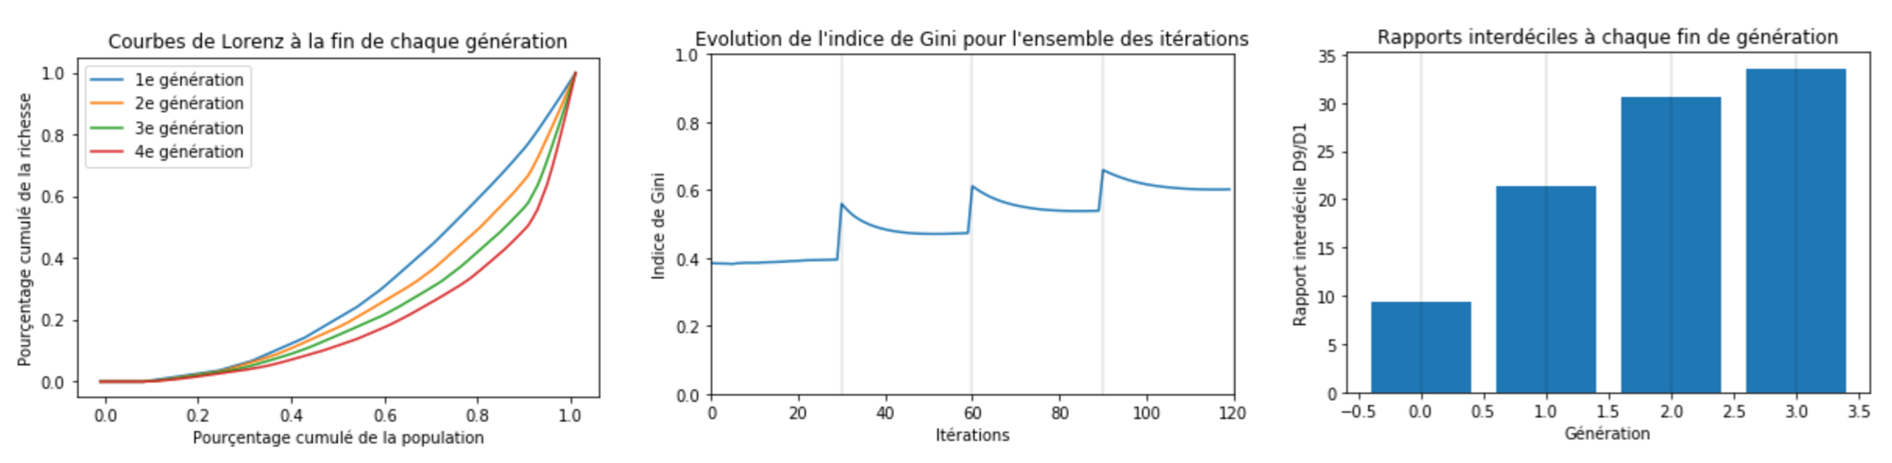
   
Ces résultats semblent cohérents et témoignent d’un certain réalisme de notre modèle.

-	Si on augmente le nombre d’individus, les résultats restent les mêmes sauf dans le cas d’une raréfaction des ressources (on diminue la proportion de cases de la map qui se régénèrent en grain à chaque génération) : les inégalités s’accroissent entre les générations et à l’intérieur d’une même génération.
-	Si on augmente la durée de vie des individus, les inégalités diminuent moins à l’intérieur d’une même génération. En effet, accroître la durée de vie revient à raréfier les ressources, puisqu’elles ne se régénèrent qu’à la fin d’un cycle. Cela accentue l’accroissement des inégalités entre les générations (processus cumulatif plus fort). 
-	Si on ne transmet que la richesse (les capacités de stockage sont alors aléatoires), on observe une déformation de la courbe de Lorenz. La courbe s’aplatit pour le bas de la distribution et se creuse pour le haut de la distribution. Les inégalités diminuent entre les plus pauvres mais les écarts se creusent entre les plus riches. Cela peut même se traduire par une diminution de l’indice de Gini, qui correspond à une déformation de la courbe de Lorenz (c’est-à-dire une déformation de la répartition des richesses) et non à une réduction des inégalités. 
-	Si on ne transmet que les capacités (et qu’on ne transmet aucune richesse), les inégalités restent constantes. Cela correspond à une régénération aléatoire d’individus, il n’y a pas de creusement particulier des inégalités. Ce test confirme que notre modélisation de nouvelles générations et d'une transmission entre celles-ci est réaliste, puisque sans cela les inégalités ne se creusent pas.  
-	Dans le cas du modèle à une seule génération : l’indice de Gini croit, ce qui traduit un accroissement des inégalités (si la durée de vie est assez longue pour rencontrer le problème de la raréfaction des ressources). On peut dans ce cas procéder à une rapide vérification du modèle : on obtient les mêmes résultats en modélisant de deux manière différente une unique génération : 1) on choisit une durée de vie égale au nombre d’itérations, 2) on modélise plusieurs générations mais on transmet l’intégralité de la richesse et les capacités avec une probabilité de 1 et on choisit une vision égale à la taille de la map. 
-	Vérification de la loi de Pareto ? (80% de la richesse totale de la société est détenue par 20% de la population)  On observe que la part de la richesse totale détenue par les 20% les plus riches augmente à chaque génération. Après un grand nombre de générations (12 avec les paramètres intermédiaires), la loi de Pareto est ainsi vérifiée : la part détenue se stabilise aux alentours de 80%.

**Pistes d’amélioration** : Comme indiqué précédemment, l’intérêt principal du modèle d’Epstein et Axtell dont nous nous sommes inspiré.e.s est qu’il part d’une base très simple à laquelle il est possible d’ajouter de nombreuses hypothèses, qui complexifient le modèle et permettent une meilleure représentation de la réalité. Nous avons ainsi listé certaines pistes d’amélioration, qu’il serait possible (avec plus de temps), d’ajouter à notre modèle pour le rendre plus réaliste : 
-	Différencier davantage les individus (vision, métabolisme, espérance de vie,…)
-	Proposer une map de grain avec une répartition non aléatoire du grain (ce qui rend le lieu de « naissance » de l’individu significatif dans l’accumulation de richesse de celui-ci)
-	Intégrer une saisonnalité (régénération du grain qui diffère en fonction du cycle (temporalité) et de l’endroit)
-	Intégrer une certaine forme d’échanges entre les fourmis, avec une capacité de s’endetter 
-	Intégrer des combats pour la ressource rare (grain)
-	Intégrer des maladies   

Concernant l'observation de nos résultats, nous sommes plutôt satisfaits de leur cohérence. Cependant nous avons remarqué après de nombreuses simulations que le rapport interdecile D9/D1 n’était pas toujours pertinent pour notre modèle. La loi de Pareto et le coefficient de Gini sont eux toujours fiables. 


# Deuxième partie : implémentation du modèle


In [1]:
import numpy as np
import random as rd

import math 
import matplotlib.pyplot as plt
import scipy.io as sio

On définit la fonction qui cherche la case contenant le maximum de grain atteignable par chaque fourmi sur chaque ligne

In [2]:
def maxligne (table, grain, a,i,j,vision):
    
    #on crée la liste des indices j sur la ligne a 
    jpossibles = []
    for b in range(j-vision+1, j+vision):
        if b>=0 and b<taille :
            jpossibles.append(b) 
           
    #on élimine les cases trop éloignées
    if jpossibles != []:
        inter=[]
        for b in jpossibles :
            somme = abs(b - j) + abs(a - i)
            if somme > vision -1 :
                inter.append(b)                
        for t in inter:
            jpossibles.remove(t)
      
    #on élimine les cases qui sont occupées par d'autres fourmis
    if jpossibles != []:
        occupied = []
        for b in jpossibles:
            if table[a,b] != 0:
                occupied.append(b)
        if occupied !=[]:
            for k in occupied :
                jpossibles.remove(k)
            
    #on regarde quelles sont les quantités sur les cases qui restent
    quantite=[]
    for b in jpossibles:
        t = grain[a,b]
        quantite.append(t)
    #on prend le ou les max atteingnables de chaque ligne
    if jpossibles != []:
        miam = max(quantite)
        pasmax = []
        for b in jpossibles:
            if grain[a,b] < miam :
                pasmax.append(b)    
        if pasmax != []:
            for k in pasmax:
                jpossibles.remove(k) 

    #on prend le ou les max les plus proche
    if jpossibles != []:
        toofar = []
        distance = []
        for b in jpossibles :
            distance.append(abs(b-j) + abs(a-i))
        mindistance = min(distance)
        for k in range(len(distance)):
            if distance[k] > mindistance:
                toofar.append(jpossibles[k])
        if toofar != [] :      
            for k in toofar:
                jpossibles.remove(k)
            
    return(jpossibles)       

Parmi ces maximums, on retient le max des max et le plus proche


In [3]:
def maxcercle(vision,i,j,listemaxi,ligne, listejmax):
    n=len(ligne)
    indicespossibles = []
    #on crée la liste contenant le nombre d'indices possibles
    for z in range(n):
        indicespossibles.append(z)

    miam = max(listemaxi)
    arraymaxi = np.array(listemaxi)
    pasmax = []
    #on ne garde que les max des max
    for s in indicespossibles:
        if arraymaxi[s] < miam :
            pasmax.append(s)    
    if pasmax != []:
        for k in pasmax:
            indicespossibles.remove(k) 
                     
    #on obtient une liste avec les max (tous égaux)
    #on veut trouver le plus proche    
    distance = []
    toofar = []
    for n in indicespossibles :
        somme = abs(listejmax[n] - j) + abs(ligne[n] - i)
        #print("somme=",somme)
        distance.append(somme)
    mindistance = min(distance)   
    for k in range(len(distance)):
        if distance[k] > mindistance :
            toofar.append(indicespossibles[k])
    if toofar != [] :      
        for k in toofar:
            indicespossibles.remove(k)                        
    return(indicespossibles)

On définit ensuite la fonction d'hérédité (régénération des fourmis à l'issue de leur durée de vie)

In [4]:
def heredite(info, table,nbrfourmisdepart,cycle,c, s,p,m):
    nvgene = []
    #transmission des fourmis encore vivantes
    old = 0
    for i in range(taille):
        for j in range(taille):
            if table[i,j] > 0:
                old = old +1
                identification = table[i,j]
                k = gencol(nbrfourmisdepart, info,cycle,identification)
                table[i,j] = 0
                info[4,k] = -1 #comme ça qu'on différencie mort de faim et mort naturelle
                info[0,k+nbrfourmisdepart] = cycle+1
                info[1,k+nbrfourmisdepart] = identification  #descendance numéro g de la fourmi numéro fournum
                info[2,k+nbrfourmisdepart] = rd.choices([rd.randint(0,m), info[2,k]],[1-c,c])[0] #c proba de transmettre ses capacités 
                info[3,k+nbrfourmisdepart] = rd.choices([0,p*info[3,k]], [1-s, s])[0] #s proba de transmettre son stock
                nvgene.append(info[1,k+nbrfourmisdepart])
                
    #remplacement des fourmis mortes
    for y in range((cycle-1)*nbrfourmisdepart,(cycle)*nbrfourmisdepart-1):
        #print(y)
        if info[4,y] > 0:
            info[0,y+nbrfourmisdepart] = cycle+1
            info[1,y+nbrfourmisdepart] = info[1,y]  #descendance numéro g de la fourmi numéro y
            info[2,y+nbrfourmisdepart] = rd.choices([rd.randint(0,m), info[2,y]],[p,1-p])[0] #pas de transmission des capacités
            info[3,y+nbrfourmisdepart] = 0 #pas de transmission de stock
            nvgene.append(info[1,y+nbrfourmisdepart])  
    
    table = np.zeros((taille,taille), dtype=int)
    for n in nvgene:
        k = rd.randint(0,taille-1)
        l = rd.randint(0,taille-1)
        while table[k,l] != 0 :
            k = rd.randint(0,taille-1)
            l = rd.randint(0,taille-1)
        table[k,l] = n
    nbrzero=0
    for i in range(taille):
        for j in range(taille):
            if table[i,j] == 0:
                nbrzero = nbrzero +1
    nbrfourmisdepart = taille**2 - nbrzero
           
          
    return(info, table, old)


Fonction permettant de retrouver une fourmi sachant son numéro et sa génération 

In [5]:
def gencol(nbrfourmisdepart, info,cycle,identification):
    p = (cycle-1)*nbrfourmisdepart
    while info[1,p] != identification and p <= (cycle)*nbrfourmisdepart-1 :
        p = p + 1
    
    return(p)




Fonction de rente : les fourmis appartenant au 9ème décile touchent une rente correspondant à 2% de leur richesse

In [6]:
def rente(info,nbrfourmisdepart,cycle):
    info3o = info[3,(cycle-1)*nbrfourmisdepart:cycle*nbrfourmisdepart]
    riches = info3o.copy
    riches = list(np.sort(info3o))
    d9 = riches[int(nbrfourmisdepart*90/100)]
    for i in range(len(info3o)):
        if info3o[i] >= d9 : 
            info3o[i] = (1.02)*info3o[i]
    info[3,(cycle-1)*nbrfourmisdepart:cycle*nbrfourmisdepart] = info3o
    return(info)   

Fonction de croissance du grain 

In [7]:
def wachstum(grain,t, v):
    for i in range(taille):
        for j in range(taille):
            grain[i,j] = grain[i,j] + rd.choices([t,0],[v,1-v])[0]
    
    return(grain)



Fonction d'itération

In [8]:
def iteration (taille, vision, iterations, dureedevie, p, t, v):

    #matrices de stockage pour les graphismes:
    liste=list()
    listefourmis=list() 
    richesses=list() 
    grainz=[]
    
    
    #On crée la matrice contenant les fourmis
    #chaque fourmi est identifiée par un numéro 
    table = np.zeros((taille,taille),dtype=int)
    for n in range(1,nbrindiv+1):
        k = rd.randint(0,taille-1)
        l = rd.randint(0,taille-1)
        while table[k,l] != 0 :
                k = rd.randint(0,taille-1)
                l = rd.randint(0,taille-1)
        table[k,l]=n
    nbrzero=0
    for i in range(taille):
        for j in range(taille):
            if table[i,j] == 0:
                nbrzero = nbrzero +1
    nbrfourmisdepart = taille**2 - nbrzero
    print("il y a", nbrfourmisdepart, "fourmis au départ")
    
    
                
    #on crée aléatoirement les quantités de grain dans chaque cellule de la map
    grain = np.zeros((taille,taille),dtype=int)
    for i in range (taille):
        for j in range (taille):
            k = rd.randint(0,10)
            grain[i,j] = k
   
    
    
    #on stocke les caractérstiques des fourmis dans une matrice
    #première ligne = numéro de la fourmi
    #deuxième ligne = capacité de stockage de la fourmi
    #troisième ligne =  stock de la fourmi
    #quatrième ligne = ordre de mort de la fourmi
    info = np.zeros((5,nbrfourmisdepart*(int(iterations/dureedevie)+1)),dtype=int)
    z=0
    for i in range (taille):
        for j in range (taille):
            if table[i,j] > 0:
                info[0,z] = 1
                info[1,z]=table[i,j]
                info[2,z]=rd.randint(0,m)
                z = z + 1
    
    #début des itérations:
     
    deaths = 0    
    cycle = 1  
    
    for n in range (1,iterations+1):
        
        #les fourmis les plus riches recoivent leur rente
        rentes = rente(info,nbrfourmisdepart,cycle)
        info = rentes 
        
    
        #le programme tourne tant que la map des grains n'est pas vide
        sumgrain = 0
        for i in range(taille):
            for j in range(taille):
                sumgrain = sumgrain + grain[i,j]
        if sumgrain == 0:
            print("Il n'y a plus de grain")
        if sumgrain != 0 : 
                
              
            for i in range (taille):
                for j in range (taille):
                    if table[i,j] > 0:
                        identification = table[i,j]
                        k = gencol(nbrfourmisdepart,info,cycle,identification)
                        jm = j
                        im = i 
                        ligne = []
                        listemaxi = []
                        listejmax=[]
                        table[i,j]=0
                        for a in range(i-vision+1,i+vision):
                              if a>=0 and a<taille:
                                    ligne.append(a) #liste des indices des lignes
                                    jpossibles = maxligne (table, grain, a,i,j,vision) 
                                    if jpossibles == []:
                                        ligne.remove(a)
                                    if jpossibles != []:
                                        jma = rd.choice(jpossibles)
                                        listejmax.append(jma) #liste des indices jmax du max de chaque ligne
                                        maxi = grain[a,jma] #valeur du maxgrain de la ligne a
                                        listemaxi.append(maxi) #liste des maxgrain de chaque ligne
                        indicespossibles = maxcercle(vision,i,j,listemaxi,ligne, listejmax)
                        destination = rd.choice(indicespossibles)
                        im = ligne[destination]
                        jm = listejmax[destination]    
                            
          #la fourmi emporte ses caractéristiques avec elle
                        table[im,jm]= -identification
                        grain[im,jm] = grain[im,jm]-1 #la fourmi mange un grain
                           #la fourmi stocke le maximum qu'elle peut en fonction de ces capacités et de la disponibilité 
                        a = min(info[2,k], grain[im,jm]) 
                        info[3,k] = info[3,k] + a
                        grain[im,jm] = grain[im,jm] -a


                           #la foumi consomme son stock si il n'y a plus de grain disponible
                        if grain[im,jm] == -1:
                            grain[im,jm] = 0
                            info[3,k] = info[3,k] -1 
                           #si la fourmi n'a plus de stock elle meurt
                        if info[3,k] == -1 : 
                            info[3,k] = 0
                            deaths = deaths+1
                            info[4,k] = deaths
                            table[im,jm]=0
        
                       
            for i in range (taille):
                for j in range (taille):
                    table[i,j] = abs(table[i,j])
            
            
            
            if n == dureedevie*cycle :
                deaths = 0
                inter = heredite(info, table,nbrfourmisdepart,cycle,c, s,p,m)
                table = inter[1]
                info= inter[0]
                old = inter[2]
                grain = wachstum(grain,t, v)
                cycle = cycle + 1
                print("il y a",old,"morts de vieillesse à la fin du", cycle -1, "eme cycle")
                print("il y a", nbrfourmisdepart, "fourmis au départ du", cycle,"eme cycle")
            
            
            nbrzero=0
            for i in range(taille):
                for j in range(taille):
                    if table[i,j] == 0:
                        nbrzero = nbrzero +1
            fourmis = taille**2 - nbrzero
            
           
                            
            #on stocke les matrices grain afin d'enregistrer les images ensuite
            a=np.array(grain)
            liste.append(a)
            
           
                        
            #on exagere le numero de chaque fourmi afin que sa couleur ressorte 
            #bien sur les graphiques 
            for i in range (taille):
                for j in range (taille):
                    if table[i,j] !=0:
                        table[i,j]= table[i,j]+100
                            
            #on stocke les matrices fourmi afin d'enregistrer les images ensuite
            b=np.array(table)
            listefourmis.append(b)
            
            #on "renomme"les fourmis (=on supprime l'exagération)
            for i in range (taille):
                for j in range (taille):
                    if table[i,j] !=0:
                        table[i,j]=table[i,j]-100
            
            #Pour lorenz, on stocke la 3e ligne de info
            richesses = info[3,]
            h = np.array(info[3,])
            grainz.append(h)
            
          # print("table=\n",table)
            #print("grain=\n",grain)
            #print("info=\n",info)
           # print("il y a", nbrfourmisdepart, "fourmis au départ")
           # print("Il y a", fourmis, "fourmis après", n, "itérations")
            if deaths>0:
                print("Il y a", deaths, "morts (de faim) après", n, "itérations")
            
    return (info, richesses, nbrfourmisdepart, liste, listefourmis, grainz)  

# Troisième partie : simulations et tests

On fait tourner le modèle en modifiant les paramètres ci-dessous, et on regarde comment évoluent les inégalités grâce à différents indicateurs présentés graphiquement ensuite.

### N'hésitez pas à changer les paramètres de cette cellule afin d'observer l'effet de ceux-ci sur les résultats.

In [12]:
taille =  50 #taille de la map
nbrindiv = 20 #nombre d'individus sur la map (doit être inférieur à taille*taille)
vision = 5 #distance max à laquelle les indvidus peuvent se déplacer
iterations = 150 #nombre d'itérations
dureedevie = 30 #durée de vie maximum des fourmis

m = 10 #capacité de stockage maximum
s = 3/4 #probabilité de transmettre sa richesse à ses descendants
p = 1 #part de la richesse transmise
c = 1 #probabilité de transmettre ses capacités (de stockage) à ses descendants
t = 5 #vitesse de croissance du sucre
v = 1 #part des cases de la matrice grain qui se régénèrent à chaque cycle

info, richesses, nbrfourmisdepart, liste, listefourmis, grainz = iteration (taille, vision, iterations, dureedevie, p, t, v)

il y a 20 fourmis au départ
il y a 20 morts de vieillesse à la fin du 1 eme cycle
il y a 20 fourmis au départ du 2 eme cycle
il y a 20 morts de vieillesse à la fin du 2 eme cycle
il y a 20 fourmis au départ du 3 eme cycle
il y a 20 morts de vieillesse à la fin du 3 eme cycle
il y a 20 fourmis au départ du 4 eme cycle
il y a 20 morts de vieillesse à la fin du 4 eme cycle
il y a 20 fourmis au départ du 5 eme cycle
il y a 20 morts de vieillesse à la fin du 5 eme cycle
il y a 20 fourmis au départ du 6 eme cycle


### Cellule de création du gif affiché au-dessus

In [ ]:
plt.pcolormesh(liste[0],cmap ='Greys',alpha=0.60) 
plt.pcolormesh(listefourmis[0],cmap='Greens',alpha=0.60) 
plt.savefig('grain1.png') 
plt.pcolormesh(liste[int(iterations/10)],cmap ='Greys',alpha=0.60) 
plt.pcolormesh(listefourmis[int(iterations/10)],cmap='Greens',alpha=0.60) 
plt.savefig('grain2.png') 
plt.pcolormesh(liste[int(2*iterations/10)],cmap ='Greys', alpha=0.60) 
plt.pcolormesh(listefourmis[int(2*iterations/10)],cmap='Greens',alpha=0.60) 
plt.savefig('grain3.png') 
plt.pcolormesh(liste[int(4*iterations/10)],cmap ='Greys', alpha=0.60) 
plt.pcolormesh(listefourmis[int(4*iterations/10)],cmap='Greens',alpha=0.60) 
plt.savefig('grain4.png') 
plt.pcolormesh(liste[int(5*iterations/10)],cmap ='Greys',alpha=0.60) 
plt.pcolormesh(listefourmis[int(5*iterations/10)],cmap='Greens',alpha=0.60) 
plt.savefig('grain5.png') 
plt.pcolormesh(liste[int(6*iterations/10)],cmap ='Greys',alpha=0.60) 
plt.pcolormesh(listefourmis[int(6*iterations/10)],cmap='Greens',alpha=0.60) 
plt.savefig('grain6.png') 
plt.pcolormesh(liste[int(7*iterations/10)],cmap ='Greys',alpha=0.60) 
plt.pcolormesh(listefourmis[int(7*iterations/10)],cmap='Greens',alpha=0.60) 
plt.savefig('grain7.png') 
plt.pcolormesh(liste[int(8*iterations/10)],cmap ='Greys',alpha=0.60) 
plt.pcolormesh(listefourmis[int(8*iterations/10)],cmap='Greens',alpha=0.60) 
plt.savefig('grain8.png') 
plt.pcolormesh(liste[int(9*iterations/10)],cmap ='Greys',alpha=0.60) 
plt.pcolormesh(listefourmis[int(9*iterations/10)],cmap='Greens',alpha=0.60)
plt.savefig('grain9.png')

import imageio 
images = [] 
filenames=['grain1.png','grain2.png','grain3.png','grain4.png','grain5.png','grain6.png','grain7.png','grain8.png','grain9.png'] 
for filename in filenames: 
    images.append(imageio.imread(filename)) 
    imageio.mimsave('movie.gif', images)
plt.clf()

### Cellule d'affichage graphique des résultats

GIF des fourmis (points verts) se déplaçant sur la map et des niveaux de grains sur la base de 10 images régulières


Les 20% les plus riches détiennent 36.72 % de la richesse totale à la fin de la génération 1
Les 20% les plus riches détiennent 44.73 % de la richesse totale à la fin de la génération 2
Les 20% les plus riches détiennent 51.29 % de la richesse totale à la fin de la génération 3
Les 20% les plus riches détiennent 57.86 % de la richesse totale à la fin de la génération 4
Les 20% les plus riches détiennent 62.5 % de la richesse totale à la fin de la génération 5


<BarContainer object of 5 artists>

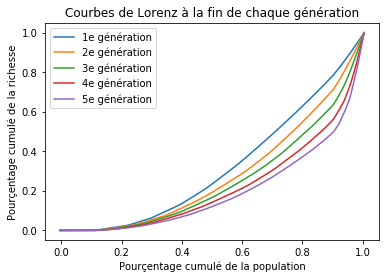

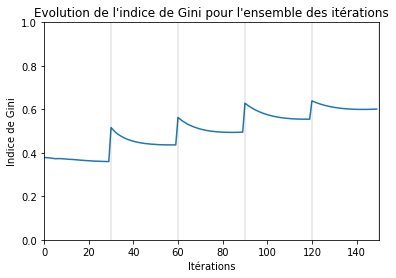

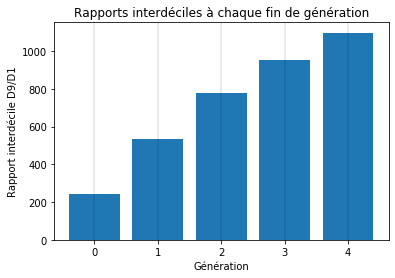

In [11]:
#On affiche le GIF fourmis+grains créé à la cellule suivante
print ('GIF des fourmis (points verts) se déplaçant sur la map et des niveaux de grains sur la base de 10 images régulières')
from IPython.display import Image
display(Image(url='movie.gif'))




#Loi de Pareto à chaque génération
nbrgene = int(iterations/dureedevie)
for k in range(1,nbrgene+1):
    rich = richesses[(k-1)*nbrfourmisdepart:k*nbrfourmisdepart]
    richtot = sum(rich)
    rich = np.sort(rich)
    vingt = sum(rich[int(nbrfourmisdepart*80/100):nbrfourmisdepart])
    pareto = round(vingt*100/richtot,2)
    print("Les 20% les plus riches détiennent", pareto,"% de la richesse totale à la fin de la génération", k)

#Courbes de Lorenz à la fin de chaque génération: version superposée 
plt.figure(1)
nbrgene = int(iterations/dureedevie)
for k in range(1,nbrgene+1):
    n = nbrfourmisdepart
    rich = richesses[(k-1)*nbrfourmisdepart:k*nbrfourmisdepart]
    lorenz = np.cumsum(np.sort(rich)) / rich.sum()
    lorenz = np.append([0],lorenz) 
    xaxis = np.linspace(0-1/n,1+1/n,n+1) 
    plt.plot(xaxis,lorenz,label=str(k) + "e génération")
    plt.xlabel("Pourçentage cumulé de la population")
    plt.ylabel("Pourçentage cumulé de la richesse")
    plt.title("Courbes de Lorenz à la fin de chaque génération")
    plt.legend()

    
#On plot un Gini global
plt.figure(2)

ygini=[]
x=[]

for i in range(iterations):
    x.append(i)
    n = nbrfourmisdepart
    gene = int(i/dureedevie)+1 
    it = grainz[i]
    rich = it[(gene-1)*nbrfourmisdepart:gene*nbrfourmisdepart]
    lorenz = np.cumsum(np.sort(rich)) / rich.sum()
    lorenz = np.append([0],lorenz)    
    AUC= (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
    #Surface sous la courbe de Lorenz. 
    #Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, 
    #on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
    S= 0.5 - AUC# surface entre la première bissectrice et le courbe de Lorenz
    gini = 2*S
    ygini.append(gini)     
plt.plot(x,ygini)
plt.axis([0,iterations,0,1])
plt.xlabel("Itérations")
plt.ylabel("Indice de Gini")
plt.title("Evolution de l'indice de Gini pour l'ensemble des itérations")
for k in range(1,nbrgene+1):
    plt.axvline(x=k*dureedevie, alpha=0.10, color= 'k')

    
#Histogramme rapport interdécile à chaque génération
plt.figure(4)
nbrgene = int(iterations/dureedevie)

x=[]
rapportdeciles = []
for i in range(iterations):
    x.append(i)
    gene = int(i/dureedevie)+1
    it = grainz[i]
    rich = it[(gene-1)*nbrfourmisdepart:gene*nbrfourmisdepart]
    rich = np.sort(rich) 
    rich = list(rich)
    d1 = rich[int(nbrfourmisdepart*10/100)]
    d5 = rich[int(nbrfourmisdepart/2)]
    d9 = rich[int(nbrfourmisdepart*90/100)]
    ratio = d9/max(d1,1)
    rapportdeciles.append(ratio)
    
y=[]
for i in range(1,nbrgene+1):
    y.append(rapportdeciles[i*(dureedevie)-1])

y=np.array(y)
data=y
plt.xlabel("Génération")
plt.ylabel("Rapport interdécile D9/D1")
plt.title('Rapports interdéciles à chaque fin de génération')
for k in range(nbrgene):
    plt.axvline(x=k, alpha=0.10, color= 'k')
plt.bar(range(len(y)), y)


